# <center>CITS5508 Lab sheet 3: Comparing DT and SVM models for classification and regression projects.</center>

**Name: Ruan Scheepers**<br>
**Student number: 21980258**<br>
**Date created:** March 28th 2019<br>
**Last modified:** April 5th 2019<br>




# PROJECT 1: 
## Classification on Cellular Localization Sites of Proteins on E. Coli bacteria.


### Read in the data

Data was found at UCI (University of California at Irvine) Centre for Machine Learning and Intelligent
Systems. See: <br>

<br>

<https://archive.ics.uci.edu/ml/datasets/ecoli>


I NOTICED DOWNLOADING FROM THE WEB AND FROM LMS HAVE DIFFERENT PATHS (ONE IS .data FORMAT THE OTHER IS .txt) SO I HAVE BOTH BELOW, IF THE DATA DOES NOT LOAD PLEASE COMMENT/UNCOMMENT RESPECTIVE PATHS

In [1]:
# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot the figures for visualisation
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
## functions to retrieve data set
def load_data():
    #when downloading from lms it was a different file type, if unable to load uncomment/comment respective paths
    data_path = os.path.join("ecoli.data")
    #data_path = os.path.join("ecoli.data.txt")
    return pd.read_csv(data_path, delim_whitespace=True, header=None)

In [3]:
full_data = load_data()

In [4]:
full_data.head()

,0,1,2,3,4,5,6,7,8
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [5]:
full_data.describe()

,1,2,3,4,5,6,7
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [6]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
0    336 non-null object
1    336 non-null float64
2    336 non-null float64
3    336 non-null float64
4    336 non-null float64
5    336 non-null float64
6    336 non-null float64
7    336 non-null float64
8    336 non-null object
dtypes: float64(7), object(2)
memory usage: 23.7+ KB


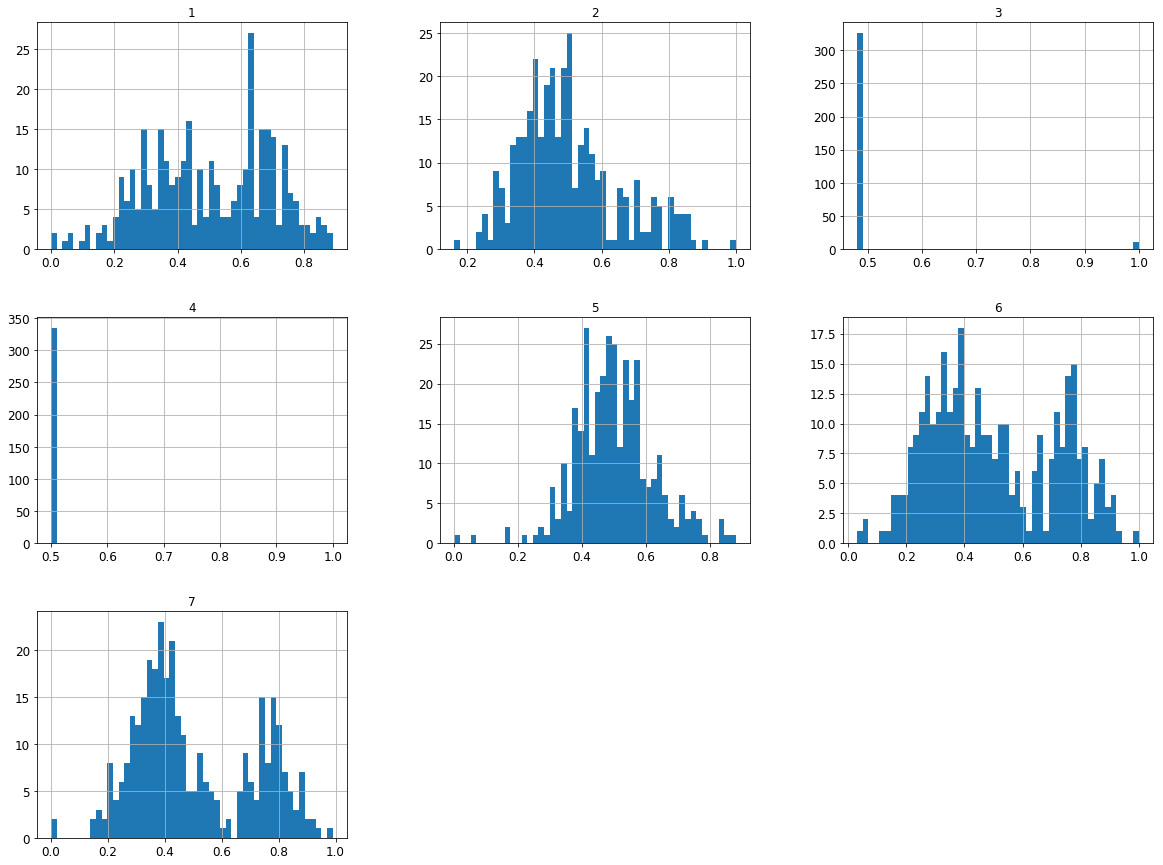

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
full_data.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
full_data[3].value_counts()

0.48    326
1.00     10
Name: 3, dtype: int64

In [9]:
full_data[4].value_counts()

0.5    335
1.0      1
Name: 4, dtype: int64

In [10]:
full_data[8].value_counts()

cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: 8, dtype: int64

## ANALYSIS

Looking at the data we can see that feature 3,4 has almost entirely a single value so when optimising our classifiers we can definitely remove them and see if there is an improvement. The non-numerical feature has all unique names so will be removed since it won't provide any meaningful information. Finally there is small variation in standard devation, features 2,5 having a smaller std compared to 1,6,7 so scaling will be done for the SVM to see if it improves the performance. 

The 'oml, imL and imS types has very few data associated to it and won't be enough to classify, those data will also be cropped. It is also important to note how skewed the data is, some types having far more than others so when the data is split it will be done by 'StratifiedShuffleSplit' to maintain the same ratio between the testing/training sets.

Below will be a scatter matrix of correlations to see if we can find any meaningful correlations. Note that features 0,3,4 were omitted for the reasons stated above. Observe feature 6 against 7 having all data to one side of a 'linear bound'

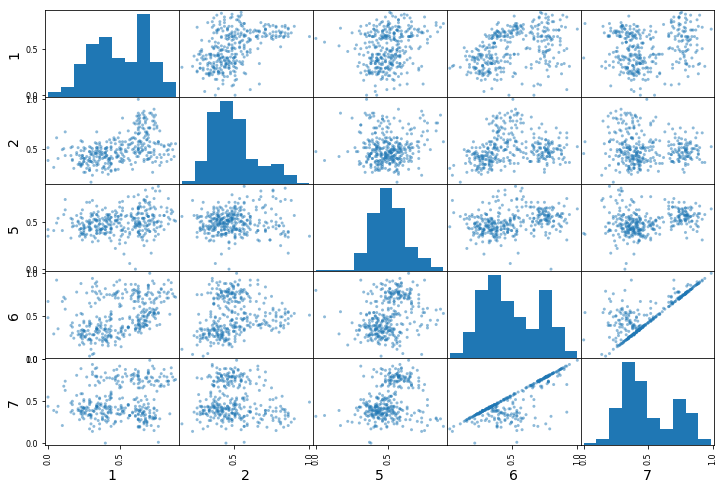

In [11]:
from pandas.plotting import scatter_matrix
attributes = [1, 2, 5, 6, 7]
scatter_matrix(full_data[attributes], figsize=(12, 8))
plt.show()

## Cropping Data

Below we crop the 'name' column and the unwanted categories. Note that the 3,4th features will be left in for now (unless the performance is very poor). Again this is a place for future fine-tuning.

In [12]:
cropped_data = full_data.copy()

In [13]:
cropped_data = cropped_data[cropped_data[8] != "imS"]
cropped_data = cropped_data[cropped_data[8] != "omL"]
cropped_data = cropped_data[cropped_data[8] != "imL"]
cropped_data = cropped_data.drop(0, axis=1)

In [14]:
cropped_data.columns = range(len(cropped_data.columns)) #ressetting index after dropping the names column

In [15]:
cropped_data.head()

,0,1,2,3,4,5,6,7
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [16]:
cropped_data = cropped_data.reset_index(drop=True) #resets row index

### Perform an 80/20 split of the data to form the training set and test set. (STRATIFIED)

In [17]:
cropped_data[7].value_counts() #make sure the cropping was done successfully

cp     143
im      77
pp      52
imU     35
om      20
Name: 7, dtype: int64

In [18]:
cropped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 8 columns):
0    327 non-null float64
1    327 non-null float64
2    327 non-null float64
3    327 non-null float64
4    327 non-null float64
5    327 non-null float64
6    327 non-null float64
7    327 non-null object
dtypes: float64(7), object(1)
memory usage: 20.5+ KB


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(cropped_data, cropped_data[7]):    
    strat_train_set = cropped_data.loc[train_index]    
    strat_test_set = cropped_data.loc[test_index] 

In [20]:
print("Ratios of the test set")
print(strat_test_set[7].value_counts() / len(strat_test_set))
print("\n")
print("Ratios of the training set")
print(strat_train_set[7].value_counts() / len(strat_train_set))
print("\n")
print("Count per training set:")
print(strat_train_set[7].value_counts())
print("\n")
print("Count per testing set:")
print(strat_test_set[7].value_counts())

Ratios of the test set
cp     0.439394
im     0.242424
pp     0.151515
imU    0.106061
om     0.060606
Name: 7, dtype: float64


Ratios of the training set
cp     0.436782
im     0.233716
pp     0.160920
imU    0.107280
om     0.061303
Name: 7, dtype: float64


Count per training set:
cp     114
im      61
pp      42
imU     28
om      16
Name: 7, dtype: int64


Count per testing set:
cp     29
im     16
pp     10
imU     7
om      4
Name: 7, dtype: int64


Notice that the ratios are maintained.

## Performance Measure

Now that we have a separated the data into a training and testing data we will train the classifiers using the training data and do an initial performance measure using cross validation against the training data. Here is where we can fine-tune the hyperparameters of the models both manually or using for example a grid search.

Then the testing data will be used for a final performance evaluation on the models to compare which performed best.

The performance will be measure in the following: 

Accuracy: How often the predicted label matches the true label, this does not measure false positives so having a trivial model that guesses the most common class will do well (especially in this case since the data is heavily skewed)

F1_score: This is a better measure of accuracy as it incorporates false positives and false negatives. It's a 'weighted average' between precision and recall. Note it does reward models that have similar precision and recall (sometimes the context demands cases where we prefer precision or recall and willing to make a tradeoff).

Confusion Matrices: Finally we will be analysing the confusion matrices, this shows the true labels and misslables of the model, it can highlight a particular class being prone to misslabeling ect. This can lead to some fine-tuning or reworking of the model to better understand those classes.



# Training SVM Classifier DATA NOT NORMALISED 

#### Using GUASSIAN RBF KERNEL

This first section will train a SVM classifier using the raw data (not normalised). It will be using the Gaussian RBF Kernel. 

In [21]:
train_labels = strat_train_set[7]
test_labels = strat_test_set[7]

In [22]:
train_features = strat_train_set.drop(7,axis=1)
test_features = strat_test_set.drop(7,axis=1)

In [23]:
#Required imports
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


def plot_confusion_matrix(matrix):
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.set_xticklabels([""] + ["cp" , "im", "pp", "imU", "om"])
    ax.set_yticklabels([""] + ["cp" , "im", "pp", "imU", "om"])
    cax = ax.matshow(matrix, cmap=plt.cm.gray)
    fig.colorbar(cax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

In [24]:
svm_clf = Pipeline([
        #scaling omitted to observe the effects of feature scaling.
        ("svm_clf", SVC(kernel="rbf", gamma = 'auto', random_state=42))
    ])
svm_clf.fit(train_features, train_labels)

Pipeline(memory=None,
     steps=[('svm_clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])

In [25]:
predicted_svm_train = cross_val_predict(svm_clf, train_features, train_labels, cv = 3)

In [26]:
matrix_training_not_scaled = confusion_matrix(train_labels, predicted_svm_train)

In [27]:
print("Accuracy :")
print(cross_val_score(svm_clf, train_features, train_labels, cv = 3, scoring = "accuracy"))
print("F1 Score 'macro' :", f1_score(train_labels, predicted_svm_train, average='macro'))
print("\n")
print("Since some classes had 0 correct classifications the macro averaging of the f1 scores will be heavily skewed by those classes, so the weighted f1_score is also given. Beware it can result in an F-score that is not between precision and recall.")
print("\n")
print("F1 Score 'weighted' :", f1_score(train_labels, predicted_svm_train, average='weighted'))

Accuracy :
[0.73033708 0.74418605 0.65116279]
F1 Score 'macro' : 0.42675107608027274


Since some classes had 0 correct classifications the macro averaging of the f1 scores will be heavily skewed by those classes, so the weighted f1_score is also given. Beware it can result in an F-score that is not between precision and recall.


F1 Score 'weighted' : 0.6314618628412888


C:\Users\schee\AppData\Local\conda\conda\envs\mlenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix followed by its respective diagram:
[[113   0   0   0   1]
 [  7  54   0   0   0]
 [  1  27   0   0   0]
 [  9   1   0   0   6]
 [ 23   1   0   0  18]]


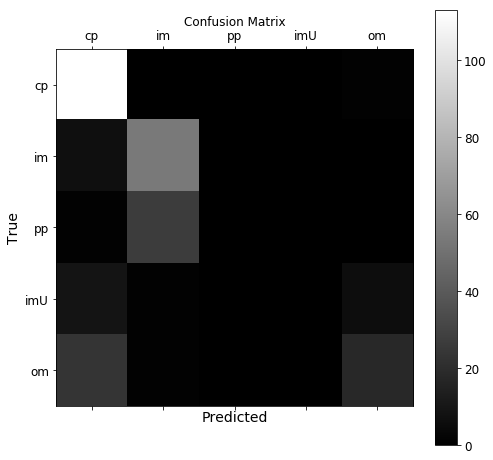

In [28]:
print("Confusion matrix followed by its respective diagram:")
print(matrix_training_not_scaled)
plot_confusion_matrix(matrix_training_not_scaled)

# Training SVM Classifier DATA NORMALISED |

In [29]:
pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [30]:
training_features_scaled = pipeline.fit_transform(train_features)

testing_features_scaled = pipeline.transform(test_features) #NOTE ONLY TRANSFORM THE TESTING DATA 

In [31]:
svm_clf_scaled = SVC(kernel="rbf", gamma = 'auto', random_state=42)

In [32]:
svm_clf_scaled.fit(training_features_scaled, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
predicted_svm_train_scaled = cross_val_predict(svm_clf_scaled, training_features_scaled, train_labels, cv = 3)

In [34]:
matrix_training_scaled = confusion_matrix(train_labels, predicted_svm_train_scaled)

In [35]:
print("Accuracy :")
print(cross_val_score(svm_clf_scaled, training_features_scaled, train_labels, cv = 3, scoring = "accuracy"))
print("F1 Score :", f1_score(train_labels, predicted_svm_train_scaled, average='macro'))

Accuracy :
[0.83146067 0.88372093 0.86046512]
F1 Score : 0.804192667919083


Confusion matrix followed by its respective diagram:
[[111   1   0   0   2]
 [  2  50   9   0   0]
 [  0  11  16   1   0]
 [  0   1   0  13   2]
 [  4   2   0   2  34]]


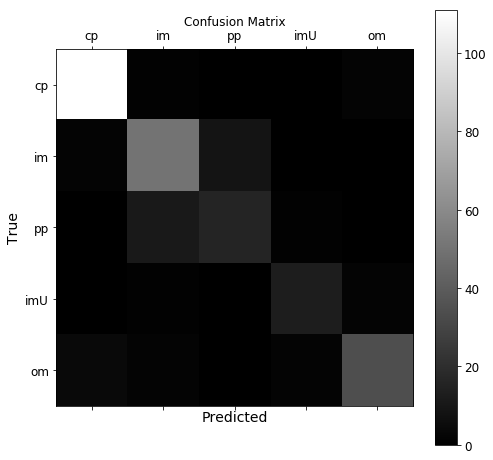

In [36]:
print("Confusion matrix followed by its respective diagram:")
print(matrix_training_scaled)
plot_confusion_matrix(matrix_training_scaled)

# Comparing feature scaling

This section will run both the classifiers (scaled and non scaled) against the test data to compare performance.


## Unscaled:

In [37]:
#predicting using non-scaled classifier
predictedSVM = svm_clf.predict(test_features)

In [38]:
matrix_not_scaled = confusion_matrix(test_labels, predictedSVM)

In [39]:
print("Accuracy :", accuracy_score(test_labels, predictedSVM))
print("f1 score 'macro':",f1_score(test_labels, predictedSVM, average='macro'))
print("\n")
print("Since some classes had 0 correct classifications the macro averaging of the f1 scores will be heavily skewed by those classes, so the weighted f1_score is also given. Beware it can result in an F-score that is not between precision and recall.")
print("\n")
print("f1 score 'weighted':",f1_score(test_labels, predictedSVM, average='weighted'))
 

Accuracy : 0.803030303030303
f1 score 'macro': 0.5077498093058733


Since some classes had 0 correct classifications the macro averaging of the f1 scores will be heavily skewed by those classes, so the weighted f1_score is also given. Beware it can result in an F-score that is not between precision and recall.


f1 score 'weighted': 0.7347121096549014


C:\Users\schee\AppData\Local\conda\conda\envs\mlenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[29  0  0  0  0]
 [ 1 15  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  0  0  4]
 [ 1  0  0  0  9]]
None


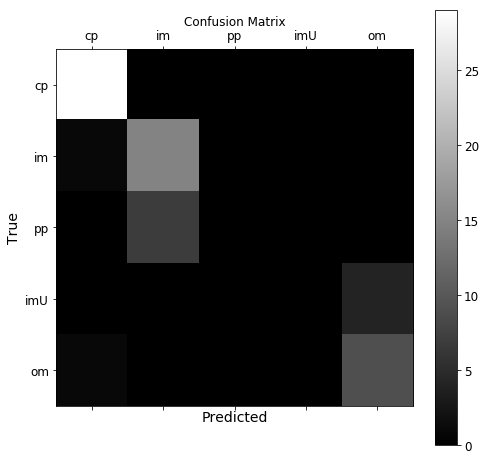

In [40]:
print(matrix_not_scaled)
print(plot_confusion_matrix(matrix_not_scaled))

## Scaled

In [41]:
predictedSVM_scaled = svm_clf_scaled.predict(testing_features_scaled)

In [42]:
matrix_scaled = confusion_matrix(test_labels, predictedSVM_scaled)

In [43]:
print("Accuracy :", accuracy_score(test_labels, predictedSVM_scaled))
print("f1 score macro :",f1_score(test_labels, predictedSVM_scaled, average='macro'))
print("f1 score weighted :",f1_score(test_labels, predictedSVM_scaled, average='weighted'))

Accuracy : 0.9242424242424242
f1 score macro : 0.9103313840155944
f1 score weighted : 0.9271959359678658


[[29  0  0  0  0]
 [ 0 11  5  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 10]]
None


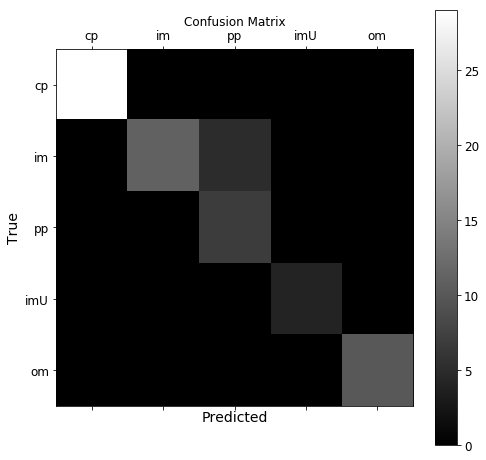

In [44]:
print(matrix_scaled)
print(plot_confusion_matrix(matrix_scaled))

# Result Analysis

First observe that the scaled classifier outperforms the non scaled in when perfromance was measured on the training set. This is reinforced by the results above. Running the performance measures on the testing se the scaled classifier outperforms the non-scaled in all performance measures. 

## DT Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [47]:
#make predictions using cross validation to get a sense of the performance on the training data
predicted_tree_train = cross_val_predict(tree_clf, train_features, train_labels, cv = 3)

In [48]:
matrix_tree_training = confusion_matrix(train_labels, predicted_tree_train)

In [49]:
print("Accuracy :")
print(cross_val_score(tree_clf, train_features, train_labels, cv = 3, scoring = "accuracy"))
print("F1 Score 'macro' :", f1_score(train_labels, predicted_tree_train, average='macro'))

Accuracy :
[0.80898876 0.80232558 0.80232558]
F1 Score 'macro' : 0.7218153415212238


[[104   4   0   2   4]
 [  2  50   8   1   0]
 [  1  13  13   0   1]
 [  0   0   1  10   5]
 [  3   2   1   3  33]]
None


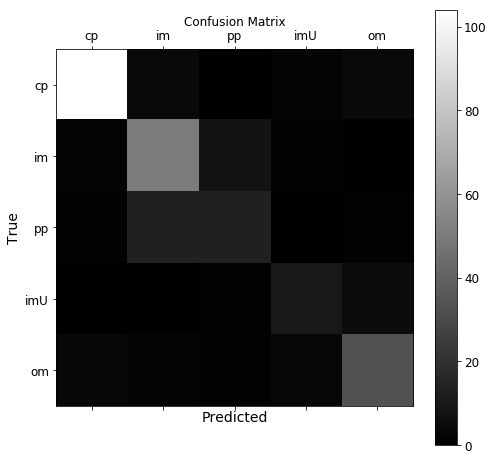

In [50]:
print(matrix_tree_training)
print(plot_confusion_matrix(matrix_tree_training))

## Comparing Decision Tree and SVM

Here we will compare the performance of the decicion tree against the SVM classifier. We will measure the performance on the testing set. (The results for the svm is the same just shown again for convienve in comparison).



In [51]:
predicted_tree_clf = tree_clf.predict(test_features)
predictedSVM_scaled = svm_clf_scaled.predict(testing_features_scaled)

Accuracy For Decision Tree: 0.7575757575757576
Accuracy For SVM: 0.9242424242424242
f1 score For Decision Tree : 0.7575757575757576
f1 score For SVM : 0.9242424242424242



The confusion matrix for the Decision Tree Classifier:
[[27  0  0  2  0]
 [ 0  9  6  0  1]
 [ 0  1  6  0  0]
 [ 0  0  1  3  0]
 [ 2  2  1  0  5]]






The confusion matrix for the SVM Classifier:
[[29  0  0  0  0]
 [ 0 11  5  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 10]]





<function matplotlib.pyplot.show(*args, **kw)>

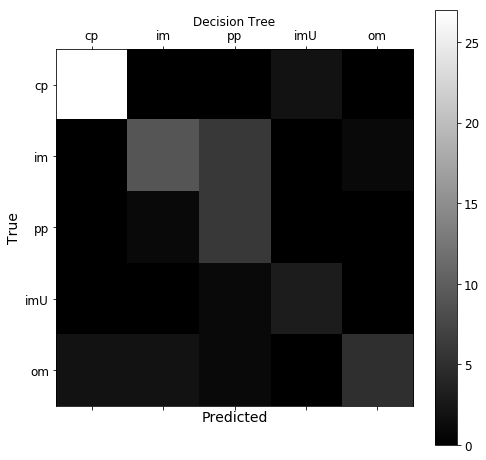

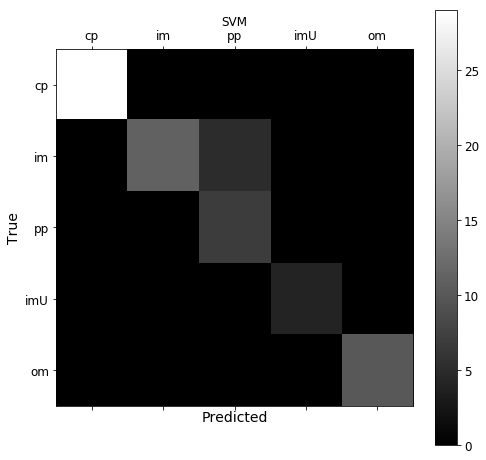

In [52]:
tree_matrix = confusion_matrix(test_labels, predicted_tree_clf)
svm_matrix = confusion_matrix(test_labels, predictedSVM_scaled)

print("Accuracy For Decision Tree:", accuracy_score(test_labels, predicted_tree_clf))
print("Accuracy For SVM:", accuracy_score(test_labels, predictedSVM_scaled))

print("f1 score For Decision Tree :",f1_score(test_labels, predicted_tree_clf, average='micro'))
print("f1 score For SVM :",f1_score(test_labels, predictedSVM_scaled, average='micro'))
print("\n\n")
print("The confusion matrix for the Decision Tree Classifier:")
print(tree_matrix)
print("\n\n")
plot_confusion_matrix(tree_matrix)
plt.title("Decision Tree")
plt.show
print("\n\n")
print("The confusion matrix for the SVM Classifier:")
print(svm_matrix)
print("\n\n")
plot_confusion_matrix(svm_matrix)
plt.title("SVM")
plt.show

# Result Analysis

As seen above the SVM out performed the decision tree significantly:

A few things to note:

The testing set is small and some classes have a very low count, so a correct 'lucky' guess would impact the performance measure significantly. Future analysis can be done by running over different random states to observe the variance in performance or more data can be collected (this will also improve the training quality).

The current results above show no fine tuning, including hyper-parameters or the removal of features 3,4 as mentioned in the initial data analysis above. We can see that the DT particularly struggled with the 'om' category and has potential for fine tuning. 

With these things in mind, the SVM performed better than the Decision Tree


# PROJECT 2:

## Predicting the maximum temperature in Perth from Solar Exposure. 

In [53]:
# This cell can be skipped if project 1 has already been executed
# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot the figures for visualisation
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [54]:
## functions to retrieve data set
def load_solarExposure():
    csv_path = os.path.join("SolarExposure_2018_Data.csv")
    return pd.read_csv(csv_path)

def load_temperature():
    csv_path = os.path.join("Temperature_2018_Data.csv")
    return pd.read_csv(csv_path)

In [55]:
solar_data = load_solarExposure() ##load the solar data
solar_data.head() ##confirm the load was successful and view the columns

,Product code,Bureau of Meteorology station number,Year,Month,Day,Daily global solar exposure (MJ/m*m)
0,IDCJAC0016,9225,2018,1,1,31.8
1,IDCJAC0016,9225,2018,1,2,31.8
2,IDCJAC0016,9225,2018,1,3,31.7
3,IDCJAC0016,9225,2018,1,4,31.6
4,IDCJAC0016,9225,2018,1,5,24.8


In [56]:
temperature_data = load_temperature() ##load the training data
temperature_data.head() ##confirm the load was successful and view the columns

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,9225,2018,1,1,34.0,1,Y
1,IDCJAC0010,9225,2018,1,2,37.7,1,Y
2,IDCJAC0010,9225,2018,1,3,29.8,1,Y
3,IDCJAC0010,9225,2018,1,4,30.9,1,Y
4,IDCJAC0010,9225,2018,1,5,26.1,1,Y


In [57]:
print("Column breakdown for Temperature Data\n")
print(temperature_data.info())
print("___________________________________________________________")
print("\n\nColumn breakdown for Solar Data\n")
print(solar_data.info())

Column breakdown for Temperature Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
Product code                                   365 non-null object
Bureau of Meteorology station number           365 non-null int64
Year                                           365 non-null int64
Month                                          365 non-null int64
Day                                            365 non-null int64
Maximum temperature (Degree C)                 365 non-null float64
Days of accumulation of maximum temperature    365 non-null int64
Quality                                        365 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 22.9+ KB
None
___________________________________________________________


Column breakdown for Solar Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
Product code                            365 non-null objec

In [58]:
temperature_data.describe()

,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature
count,365.0,365.0,365.000000,365.000000,365.000000,365.0
mean,9225.0,2018.0,6.526027,15.720548,24.654795,1.0
std,0.0,0.0,3.452584,8.808321,5.566018,0.0
min,9225.0,2018.0,1.000000,1.000000,14.100000,1.0
25%,9225.0,2018.0,4.000000,8.000000,20.000000,1.0
50%,9225.0,2018.0,7.000000,16.000000,24.200000,1.0
75%,9225.0,2018.0,10.000000,23.000000,28.700000,1.0
max,9225.0,2018.0,12.000000,31.000000,41.200000,1.0


In [59]:
solar_data.describe()

,Bureau of Meteorology station number,Year,Month,Day,Daily global solar exposure (MJ/m*m)
count,365.0,365.0,365.000000,365.000000,365.000000
mean,9225.0,2018.0,6.526027,15.720548,18.883014
std,0.0,0.0,3.452584,8.808321,7.771997
min,9225.0,2018.0,1.000000,1.000000,2.900000
25%,9225.0,2018.0,4.000000,8.000000,12.200000
50%,9225.0,2018.0,7.000000,16.000000,17.900000
75%,9225.0,2018.0,10.000000,23.000000,25.500000
max,9225.0,2018.0,12.000000,31.000000,32.000000


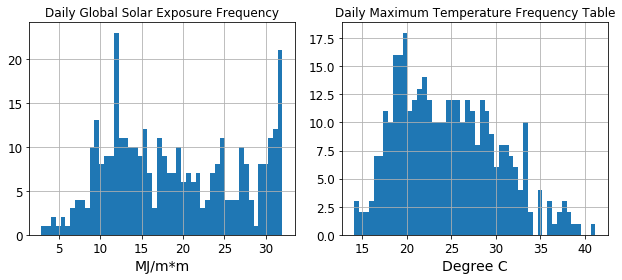

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
solar_data["Daily global solar exposure (MJ/m*m)"].hist(bins=50, figsize=(9,4))
plt.title('Daily Global Solar Exposure Frequency')
plt.xlabel('MJ/m*m')


plt.subplot(1, 2, 2)
temperature_data["Maximum temperature (Degree C)"].hist(bins=50, figsize=(9,4))
plt.title('Daily Maximum Temperature Frequency Table')
plt.xlabel('Degree C')
plt.tight_layout()
plt.show()



Text(0, 0.5, 'Maximum temperature (Degree C)')

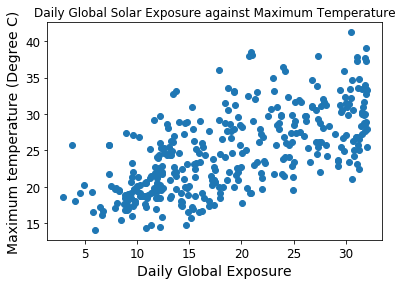

In [61]:
plt.scatter(solar_data["Daily global solar exposure (MJ/m*m)"], temperature_data["Maximum temperature (Degree C)"])
plt.title('Daily Global Solar Exposure against Maximum Temperature')
plt.xlabel('Daily Global Exposure')
plt.ylabel('Maximum temperature (Degree C)')

## Analysis

First we can note that all data was taken from the same station in the same year, these columns will be of no use and can be dropped. Secondly the solar exposure seems to be bi-modal on the extreme ends but the daily maximum temperature uni- modal. It looks as there is a small positive correlation between the daily exposure and the daily temperature, but it looks too 'weak' for any direct correlation models to work. This is not a surprise as temperature/wind etc will play a large role in maximum temperature. So using months/days will be an important feature.

Finally, we can consider how to handle 'days' it might be too high variance within a month (which we want to be the element to determine the seasonal aspects). So for especially the unscaled version the model will ALSO be trained with the days dropped to prevent any 'overfitting' against the days feature. The year split into 12 categories might be underfitting the model so a third model will be trained. The third model will split each month into two 'half-months'.

I expect the days and months model to be significantly worse in the unscaled SVM Regressor.


In [62]:
temperatures_only = temperature_data["Maximum temperature (Degree C)"]
temperatures_only.head()

0    34.0
1    37.7
2    29.8
3    30.9
4    26.1
Name: Maximum temperature (Degree C), dtype: float64

In [63]:
## GET THE DATA READY FOR THE 3 DIFFERENT MODELS 

solar_only = solar_data["Daily global solar exposure (MJ/m*m)"]
solar_months_days = solar_data[["Month", "Day", "Daily global solar exposure (MJ/m*m)"]]
solar_months = solar_data[["Month", "Daily global solar exposure (MJ/m*m)"]]
solar_halfMonths =  solar_data[["Month", "Day", "Daily global solar exposure (MJ/m*m)"]]

## Create the 'half-months' 
solar_halfMonths["Half-Month"] = solar_halfMonths["Month"]*2 - (solar_halfMonths["Day"].copy() < 15)
solar_halfMonths = solar_halfMonths[["Half-Month","Daily global solar exposure (MJ/m*m)"]]

#Glue on temperature to make the split easier
solar_only = pd.concat([solar_only, temperatures_only], axis=1)
solar_months_days = pd.concat([solar_months_days, temperatures_only], axis=1)
solar_months = pd.concat([solar_months, temperatures_only], axis=1)
solar_halfMonths = pd.concat([solar_halfMonths, temperatures_only], axis=1)

C:\Users\schee\AppData\Local\conda\conda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Split the data

Here we are randomly splitting the data (for each of the three variations of features).

In [64]:
from sklearn.model_selection import train_test_split
train_set_solar_only, test_set_solar_only = train_test_split(solar_only, test_size=0.2, random_state=42)
train_set_months_days, test_set_months_days = train_test_split(solar_months_days, test_size=0.2, random_state=42)
train_set_solar_months, test_set_solar_months = train_test_split(solar_months, test_size=0.2, random_state=42)
train_set_solar_halfMonths, test_set_solar_halfMonths = train_test_split(solar_halfMonths, test_size=0.2, random_state=42)

In [65]:
trainX_set_solar_only = train_set_solar_only["Daily global solar exposure (MJ/m*m)"]
trainX_set_months_days = train_set_months_days[["Month", "Day", "Daily global solar exposure (MJ/m*m)"]]
trainX_set_solar_months = train_set_solar_months[["Month", "Daily global solar exposure (MJ/m*m)"]]
trainX_set_solar_halfMonths = train_set_solar_halfMonths[["Half-Month","Daily global solar exposure (MJ/m*m)"]]

trainY_set_solar_only = train_set_solar_only["Maximum temperature (Degree C)"]
trainY_set_months_days = train_set_months_days["Maximum temperature (Degree C)"]
trainY_set_solar_months = train_set_solar_months["Maximum temperature (Degree C)"]
trainY_set_solar_halfMonths = train_set_solar_halfMonths["Maximum temperature (Degree C)"]

testX_set_solar_only = test_set_solar_only["Daily global solar exposure (MJ/m*m)"]
testX_set_months_days = test_set_months_days[["Month", "Day", "Daily global solar exposure (MJ/m*m)"]]
testX_set_solar_months = test_set_solar_months[["Month", "Daily global solar exposure (MJ/m*m)"]]
testX_set_solar_halfMonths = test_set_solar_halfMonths[["Half-Month","Daily global solar exposure (MJ/m*m)"]]

testY_set_solar_only = test_set_solar_only["Maximum temperature (Degree C)"]
testY_set_months_days = test_set_months_days["Maximum temperature (Degree C)"]
testY_set_solar_months = test_set_solar_months["Maximum temperature (Degree C)"]
testY_set_solar_halfMonths = test_set_solar_halfMonths["Maximum temperature (Degree C)"]


## Not Scaled SVM- REGRESSION
### Using Guassian RBF Kernel

The SVM regressors will be trained using the guassing rbf kernel

### Performance Measure

The models will be trained and then the performance will be measured against the training data using cross validation. Here is where we would fine-tune the models. 

Then when comparing the models we will be measuring their performance against the testing data.

Since this is a regression problem the Mean Square Error is an appropriate measure of performance.

In [66]:
from sklearn.svm import SVR
#three models across the three variations in the data sets.
svr_rbf_md = SVR(kernel='rbf', gamma = 'auto') #md = month + day
svr_rbf_m = SVR(kernel='rbf', gamma = 'auto') #m = month only
svr_rbf_hm = SVR(kernel='rbf', gamma = 'auto') #hm = half-month

In [67]:

#svr_rbf_so.fit(trainX_set_solar_only, trainY_set_solar_only)
svr_rbf_md.fit(trainX_set_months_days, trainY_set_months_days)
svr_rbf_m.fit(trainX_set_solar_months, trainY_set_solar_months)
svr_rbf_hm.fit(trainX_set_solar_halfMonths, trainY_set_solar_halfMonths)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [68]:
pred_md = cross_val_predict(svr_rbf_md, trainX_set_months_days, trainY_set_months_days, cv = 3)
pred_m = cross_val_predict(svr_rbf_m, trainX_set_solar_months, trainY_set_solar_months, cv = 3)
pred_hm = cross_val_predict(svr_rbf_hm, trainX_set_solar_halfMonths, trainY_set_solar_halfMonths, cv = 3)

In [69]:
from sklearn.metrics import mean_squared_error

print("Performance against the training data by cross validation :")

print("MSE for Months and Days:")
print(mean_squared_error(trainY_set_months_days, pred_md))
print("\n")
print("MSE for Months only:")
print(mean_squared_error(trainY_set_solar_months, pred_m))
print("\n")
print("MSE for Half-Months:")
print(mean_squared_error(trainY_set_solar_halfMonths, pred_hm))

Performance against the training data by cross validation :
MSE for Months and Days:
25.732663309329613


MSE for Months only:
13.7966600009663


MSE for Half-Months:
16.056934437514315


We measure the performance using Mean Square Error, For the unscaled data the months and days performed the worse. The Months only perfromed the best.

## Scaled SVM- REGRESSION
### Using Guassian RBF Kernel

We will now scale the data, it was scaled using min max scaler (it performed better than the standard scaler). The days and months can be better modelled with a 'uniform distribution' and can be treated as catagorical, fututre fine-tuning can be done here to construct a scaler that perseves this nature better.

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
        ('std_scaler', MinMaxScaler()),
])

pipeline2 = Pipeline([
        ('std_scaler', MinMaxScaler()),
])

trainX_set_md_scaled = pipeline2.fit_transform(trainX_set_months_days)
trainX_set_m_scaled = pipeline.fit_transform(trainX_set_solar_months)
trainX_set_hm_scaled = pipeline.fit_transform(trainX_set_solar_halfMonths)

testX_set_md_scaled = pipeline2.transform(testX_set_months_days)
testX_set_m_scaled = pipeline.transform(testX_set_solar_months)
testX_set_hm_scaled = pipeline.transform(testX_set_solar_halfMonths)



C:\Users\schee\AppData\Local\conda\conda\envs\mlenv\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\schee\AppData\Local\conda\conda\envs\mlenv\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\schee\AppData\Local\conda\conda\envs\mlenv\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [71]:
svr_rbf_mds = SVR(kernel='rbf', gamma = 'auto')
svr_rbf_ms = SVR(kernel='rbf', gamma = 'auto')
svr_rbf_hms = SVR(kernel='rbf', gamma = 'auto')

svr_rbf_mds.fit(trainX_set_md_scaled, trainY_set_months_days)
svr_rbf_ms.fit(trainX_set_m_scaled, trainY_set_solar_months)
svr_rbf_hms.fit(trainX_set_hm_scaled, trainY_set_solar_halfMonths)

pred_mds = cross_val_predict(svr_rbf_mds, trainX_set_md_scaled, trainY_set_months_days, cv = 3)
pred_ms = cross_val_predict(svr_rbf_ms, trainX_set_m_scaled, trainY_set_solar_months, cv = 3)
pred_hms = cross_val_predict(svr_rbf_hms, trainX_set_hm_scaled, trainY_set_solar_halfMonths, cv = 3)

print("Performance against the training data by cross validation :")

print("MSE for Months and Days:")
print(mean_squared_error(trainY_set_months_days, pred_mds))
print("\n")
print("MSE for Months only:")
print(mean_squared_error(trainY_set_solar_months, pred_ms))
print("\n")
print("MSE for Half-Months:")
print(mean_squared_error(trainY_set_solar_halfMonths, pred_hms))


Performance against the training data by cross validation :
MSE for Months and Days:
15.262288289877155


MSE for Months only:
14.004405798874032


MSE for Half-Months:
14.110230087252571


The scaling seems to be performing a lot more consistantly between types.

## Comparing Scaled vs Unscaled SVM Regressor 

The models performance will now be tested against the testing set, again using MSE.

The performance of the scaled and unscaled regressors will be compared.

In [72]:
print("Unscaled:")

print("MSE for Months and Days:")
print(mean_squared_error(testY_set_months_days, svr_rbf_md.predict(testX_set_months_days)))
print("\n")
print("MSE for Months only:")
print(mean_squared_error(testY_set_solar_months, svr_rbf_m.predict(testX_set_solar_months)))
print("\n")
print("MSE for Half-Months:")
print(mean_squared_error(testY_set_solar_halfMonths, svr_rbf_hm.predict(testX_set_solar_halfMonths)))

Unscaled:
MSE for Months and Days:
27.907072245647175


MSE for Months only:
13.479380722179558


MSE for Half-Months:
15.98691680822141


In [73]:
print("Scaled:")

print("MSE for Months and Days:")
print(mean_squared_error(testY_set_months_days, svr_rbf_mds.predict(testX_set_md_scaled)))
print("\n")
print("MSE for Months only:")
print(mean_squared_error(testY_set_solar_months, svr_rbf_ms.predict(testX_set_m_scaled)))
print("\n")
print("MSE for Half-Months:")
print(mean_squared_error(testY_set_solar_halfMonths, svr_rbf_hms.predict(testX_set_hm_scaled)))

Scaled:
MSE for Months and Days:
17.15399065078929


MSE for Months only:
16.56792469354087


MSE for Half-Months:
15.841366905927114


### Analysis 

The scaled data performs more consistantly between the features compared to the unscaled data. The unscaled data does significantly worse in the Months and Days variation. The unscaled performed better in the months only variation, this might be due to the fact that months are 'categorical' in nature within the context of the problem and its ordinal nature might not be important so the scaling could have allowed for overfitting/underfitting, lots of fine-tuning can be done here. 

The half-months scored the best for the scaled version and was very similar to the unscaled version. Futher work can be done here to maybe seperate the 'months' into categories that are more representitive of weather seasons.

## Training Decision Tree

In [74]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_md = DecisionTreeRegressor()
tree_reg_m = DecisionTreeRegressor()
tree_reg_hm = DecisionTreeRegressor()

tree_reg_md.fit(trainX_set_months_days, trainY_set_months_days)
tree_reg_m.fit(trainX_set_solar_months, trainY_set_solar_months)
tree_reg_hm.fit(trainX_set_solar_halfMonths, trainY_set_solar_halfMonths)

pred_mds_tree = cross_val_predict(tree_reg_md, trainX_set_months_days, trainY_set_months_days, cv = 3)
pred_ms_tree = cross_val_predict(tree_reg_m, trainX_set_solar_months, trainY_set_solar_months, cv = 3)
pred_hms_tree = cross_val_predict(tree_reg_hm, trainX_set_solar_halfMonths, trainY_set_solar_halfMonths, cv = 3)


print("Performance against the training data by cross validation :")

print("MSE for Months and Days:")
print(mean_squared_error(trainY_set_months_days, pred_mds_tree))
print("\n")
print("MSE for Months only:")
print(mean_squared_error(trainY_set_solar_months, pred_ms_tree))
print("\n")
print("MSE for Half-Months:")
print(mean_squared_error(trainY_set_solar_halfMonths, pred_hms_tree))

Performance against the training data by cross validation :
MSE for Months and Days:
17.322123287671236


MSE for Months only:
19.4930051369863


MSE for Half-Months:
20.33112157534246


The decicion tree scored the best in the day+months variation, but again thinking about the context the model can be very prone to overfitting the 'days'. This can be tested in the next section when the performance is measure against the testing data.

## Comparing Decision Tree against SVM 

In [75]:
print("Scaled SVM:")

print("MSE for Months and Days:")
print(mean_squared_error(testY_set_months_days, svr_rbf_mds.predict(testX_set_md_scaled)))
print("\n")
print("MSE for Months only:")
print(mean_squared_error(testY_set_solar_months, svr_rbf_ms.predict(testX_set_m_scaled)))
print("\n")
print("MSE for Half-Months:")
print(mean_squared_error(testY_set_solar_halfMonths, svr_rbf_hms.predict(testX_set_hm_scaled)))

Scaled SVM:
MSE for Months and Days:
17.15399065078929


MSE for Months only:
16.56792469354087


MSE for Half-Months:
15.841366905927114


In [76]:
print("Decicion Tree:")

print("MSE for Months and Days:")
print(mean_squared_error(testY_set_months_days, tree_reg_md.predict(testX_set_months_days)))
print("\n")
print("MSE for Months only:")
print(mean_squared_error(testY_set_solar_months, tree_reg_m.predict(testX_set_solar_months)))
print("\n")
print("MSE for Half-Months:")
print(mean_squared_error(testY_set_solar_halfMonths, tree_reg_hm.predict(testX_set_solar_halfMonths)))

Decicion Tree:
MSE for Months and Days:
19.199726027397258


MSE for Months only:
16.702682648401826


MSE for Half-Months:
18.70472602739726


## Analysis

Both models scored very-similarly. The SVM scored slightly better in the "Month and Day" and "Half Month" variation. These errors are relatively large compared to the range of the max-temperatures (27). This is not too surprising given the very 'weak' correlation between the solar and max-temperature especially since the only other feature was the date (its seasonal association is also highly variable since the weather has a large range of behaviour within a season).

Future improvements could include:

More data, especially if more features can be measured.

Fine-tuning, we did some fine-tuning with using different feature variation but no fine-tuning was done with hyperparameters.
